# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 10th kl. 23:59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

<font color='red'>**!!! IMPORTANT: YOU ARE NOT ALLOWED TO USE LIBRARY FUNCTIONS (SCIPY, NUMPY etc.) UNLESS EXPLICITY MENTIONED !!!**
</font>

Good luck!

In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [2]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wq = pd.read_csv("./data/winequality-red.csv", sep=';')
toy = wq[wq['quality'].isin([4, 8])].sample(n=20, random_state=RANDOM_SEED)

# Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (0, 0) and (1,1)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


[[-0.75082858 -0.54497977]
 [-0.456386    0.19901992]
 [-0.01472213 -0.69377971]
 [-0.456386   -0.84257965]
 [ 0.27972045  1.38941942]
 [-0.83916135 -0.84257965]
 [ 0.27972045  2.43101898]
 [-0.60360729  0.27341989]
 [-0.1030549   0.7198197 ]
 [ 0.27972045 -0.69377971]
 [-0.72138432 -0.17297993]
 [ 3.75414288 -0.99137958]
 [ 0.39749748 -0.61937974]
 [-0.78027283 -0.84257965]
 [-0.48583026  0.79421967]
 [-0.07361064  0.49661979]
 [-0.27972045  0.79421967]
 [ 0.39749748  1.53821935]
 [ 1.04527116 -1.14017952]
 [-0.86860561 -1.25177947]]


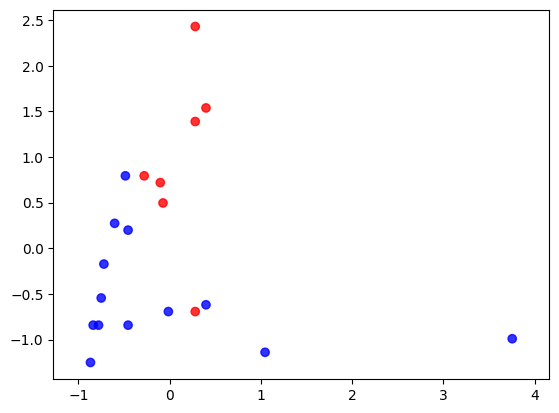

In [3]:
color_map = {4:'Blue', 8:'Red'}
X_kmeans = toy[["sulphates", "alcohol"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

print(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['quality'].map(color_map))
plt.axis('equal');

[[ 0.09502465 -0.78508876]
 [-0.11614124  0.95955293]]


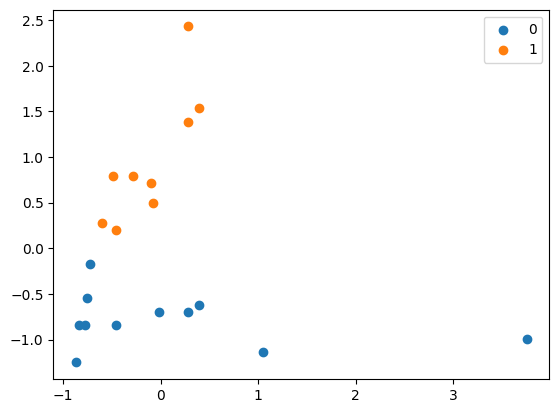

In [4]:
kmeans = KMeans(2,random_state=0, n_init="auto").fit(X_scaled)
label = kmeans.labels_
u_labels = np.unique(label)
 
centroids = kmeans.cluster_centers_
print(centroids)
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_scaled[label == i , 0] , X_scaled[label == i , 1] , label = i)
plt.legend()
plt.show()

*******************
**YOUR ANSWER HERE**
******************
Firstly, we computer the centroid $\mu_i$ for cluster $C_i$. We do this just below. <br>
$\mu_0 = \frac{1}{|C_0|} \Sigma_{x \in C_0} x = (0,0)$ <br>
$\mu_1 = \frac{1}{|C_1|} \Sigma_{x \in C_1} x = (1,1)$ <br>
We now assign the points to the cluster with the closest centroid. Thereby, we compute the Euclidean distance and assign the points to clusters. Formally, assign a point $x \in D$ to the cluster $j$ such that $j = argmin_i ||x-\mu_i||$. We now compute the distance to each cluster for each point and assign the point to the cluster with the smallest distance. <br>
$||x_0-\mu_0||^2 = (-0.75082858-0)^2 + (-0.54497977-0)^2 = 0.86074650625$ <br>
$||x_0-\mu_1||^2 = (-0.75082858-1)^2 + (-0.54497977-1)^2 = 5.45236320625$ <br>
We add $x_0$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_1-\mu_0||^2 = (-0.456386-0)^2 + (0.19901992-0)^2 = 0.24789710955$ <br>
$||x_1-\mu_1||^2 = (-0.456386-1)^2 + (0.19901992-1)^2 = 2.76262926955$ <br>
We add $x_1$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_2-\mu_0||^2 = (-0.01472213-0)^2 + (-0.69377971-0)^2 = 0.48154702711$ <br>
$||x_2-\mu_1||^2 = (-0.01472213-1)^2 + (-0.69377971-1)^2 = 3.89855070712$ <br>
We add $x_2$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_3-\mu_0||^2 = (-0.456386-0)^2 + (-0.84257965-0)^2 = 0.91822864759$ <br>
$||x_3-\mu_1||^2 = (-0.456386-1)^2 + (-0.84257965-1)^2 = 5.51615994759$ <br>
We add $x_3$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_4-\mu_0||^2 = (0.27972045-0)^2 + (1.38941942-0)^2 = 2.00872985482$ <br>
$||x_4-\mu_1||^2 = (0.27972045-1)^2 + (1.38941942-1)^2 = 0.67045011482$ <br>
We add $x_4$ to the $C_1$ cluster as it has the smallest distance. <br>
$||x_5-\mu_0||^2 = (-0.83916135-0)^2 + (-0.84257965-0)^2 = 1.41413223793$ <br>
$||x_5-\mu_1||^2 = (-0.83916135-1)^2 + (-0.84257965-1)^2 = 6.77761423793$ <br>
We add $x_5$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_6-\mu_0||^2 = (0.27972045-0)^2 + (2.43101898-0)^2 = 5.98809681127$ <br>
$||x_6-\mu_1||^2 = (0.27972045-1)^2 + (2.43101898-1)^2 = 2.56661795127$ <br>
We add $x_6$ to the $C_1$ cluster as it has the smallest distance. <br>
$||x_7-\mu_0||^2 = (-0.60360729-0)^2 + (0.27341989-0)^2 = 0.43910019678$ <br>
$||x_7-\mu_1||^2 = (-0.60360729-1)^2 + (0.27341989-1)^2 = 3.09947499679$ <br>
We add $x_7$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_8-\mu_0||^2 = (-0.1030549-0)^2 + (0.7198197-0)^2 = 0.52876071292$ <br>
$||x_8-\mu_1||^2 = (-0.1030549-1)^2 + (0.7198197-1)^2 = 1.29523111292$ <br>
We add $x_8$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_9-\mu_0||^2 = (0.27972045-0)^2 + (-0.69377971-0)^2 = 0.55957381615$ <br>
$||x_9-\mu_1||^2 = (0.27972045-1)^2 + (-0.69377971-1)^2 = 3.38769233616$ <br>
We add $x_9$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{10}-\mu_0||^2 = (-0.72138432-0)^2 + (-0.17297993-0)^2 = 0.55031739332$ <br>
$||x_{10}-\mu_1||^2 = (-0.72138432-1)^2 + (-0.17297993-1)^2 = 4.33904589332$ <br>
We add $x_{10}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{11}-\mu_0||^2 = (3.75414288-0)^2 + (-0.99137958-0)^2 = 15.0764222351$ <br>
$||x_{11}-\mu_1||^2 = (3.75414288-1)^2 + (-0.99137958-1)^2 = 11.5508956351$ <br>
We add $x_{11}$ to the $C_1$ cluster as it has the smallest distance. <br>
$||x_{12}-\mu_0||^2 = (0.39749748-0)^2 + (-0.61937974-0)^2 = 0.54163550892$ <br>
$||x_{12}-\mu_1||^2 = (0.39749748-1)^2 + (-0.61937974-1)^2 = 2.98540002893$ <br>
We add $x_{12}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{13}-\mu_0||^2 = (-0.78027283-0)^2 + (-0.84257965-0)^2 = 1.31876615583$ <br>
$||x_{13}-\mu_1||^2 = (-0.78027283-1)^2 + (-0.84257965-1)^2 = 6.56447111583$ <br>
We add $x_{13}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{14}-\mu_0||^2 = (-0.48583026-0)^2 + (0.79421967-0)^2 = 0.86681592574$ <br>
$||x_{14}-\mu_1||^2 = (-0.48583026-1)^2 + (0.79421967-1)^2 = 2.25003710575$ <br>
We add $x_{14}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{15}-\mu_0||^2 = (-0.07361064-0)^2 + (0.49661979-0)^2 = 0.25204974214$ <br>
$||x_{15}-\mu_1||^2 = (-0.07361064-1)^2 + (0.49661979-1)^2 = 1.40603144214$ <br>
We add $x_{15}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{16}-\mu_0||^2 = (-0.27972045-0)^2 + (0.79421967-0)^2 = 0.70902841436$ <br>
$||x_{16}-\mu_1||^2 = (-0.27972045-1)^2 + (0.79421967-1)^2 = 1.68002997436$ <br>
We add $x_{16}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{17}-\mu_0||^2 = (0.39749748-0)^2 + (1.53821935-0)^2 = 2.52412301532$ <br>
$||x_{17}-\mu_1||^2 = (0.39749748-1)^2 + (1.53821935-1)^2 = 0.65268935532$ <br>
We add $x_{17}$ to the $C_1$ cluster as it has the smallest distance. <br>
$||x_{18}-\mu_0||^2 = (1.04527116-0)^2 + (-1.14017952-0)^2 = 2.39260113576$ <br>
$||x_{18}-\mu_1||^2 = (1.04527116-1)^2 + (-1.14017952-1)^2 = 4.58241785576$ <br>
We add $x_{18}$ to the $C_0$ cluster as it has the smallest distance. <br>
$||x_{19}-\mu_0||^2 = (-0.86860561-0)^2 + (-1.25177947-0)^2 = 2.32142754724$ <br>
$||x_{19}-\mu_1||^2 = (-0.86860561-1)^2 + (-1.25177947-1)^2 = 8.56219770724$ <br>
We add $x_{19}$ to the $C_0$ cluster as it has the smallest distance. <br>
Currently the clusters are the following: $C_0 = \{x_0, x_1, x_2, x_3, x_5, x_7, x_8, x_9, x_{10}, x_{12}, x_{13}, x_{14}, x_{15}, x_{16}, x_{18}, x_{19}\}$ and $C_1 = \{x_4, x_6, x_{11}, x_{17}\}$. We now recompute the centroids. <br>
$\mu_0 = \frac{1}{|C_0|} \Sigma_{x \in C_0} x = (-0.33492843, -0.10555496)$ <br>
$\mu_1 = \frac{1}{|C_1|} \Sigma_{x \in C_1} x = (0.24015473, 0.19471867)$ <br>
We now repeat the above process until we reach the final centroids.

In [76]:
def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))

cluster_0 = np.delete(X_scaled, [4,6,11,18], axis=0)
centroid_0 = cluster_0.sum(axis=0) / len(cluster_0)
print("Centroid 0", centroid_0)

cluster_1 = np.delete(X_scaled, [0,1,2,3,5,7,8,9,10,12,13,14,15,16,18,9], axis=0)
centroid_1 = cluster_1.sum(axis=0) / len(cluster_0)
print("Centroid 1", centroid_1)


n_cl_0 = np.empty([2,1])
n_cl_1 = np.empty([2,1])
for i in cluster_0:
    dist_0 = L2_norm(i, centroid_0)
    dist_1 = L2_norm(i, centroid_1)
    if dist_0 < dist_1:
        print(i.shape)
        n_cl_0 = np.append(n_cl_0, i, axis=0)
        
    else:
        n_cl_1 = np.append(n_cl_1, i, axis=0)

for i in cluster_1:
    dist_0 = L2_norm(i, centroid_0)
    dist_1 = L2_norm(i, centroid_1)
    if dist_0 < dist_1:
        n_cl_0 = np.append(n_cl_0, i, axis=0)
    else:
        n_cl_1 = np.append(n_cl_1, i, axis=0)
print(n_cl_0)


centroid_0 = n_cl_0.sum(axis=0) / len(n_cl_0)
print("New Centroid 0", centroid_0)

centroid_1 = n_cl_1.sum(axis=0) / len(n_cl_1)
print("New Centroid 1", centroid_1)

# [[ 0.09502465 -0.78508876]
#  [-0.11614124  0.95955293]]


Centroid 0 [-0.33492843 -0.10555496]
Centroid 1 [0.24015473 0.19471867]
(2,)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) How you explain the difference between the two cluster assignments in point A)?

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.3 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering for the dataset of Task 1.1.1 using $\epsilon=0.35$ and $MinPts=3$. Present at least 2 iterations of the algorithm.<br> 
<font color='red'>**IMPORTANT: For this exercise you can use the DBSCAN from sklearn ONLY TO CHECK YOUR RESULTS**</font>

*******************
**YOUR ANSWER HERE**
******************


B) <span style='color: green'>**\[Describe\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1?

*******************
**YOUR ANSWER HERE**
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Describe\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [ ] Depth based approach

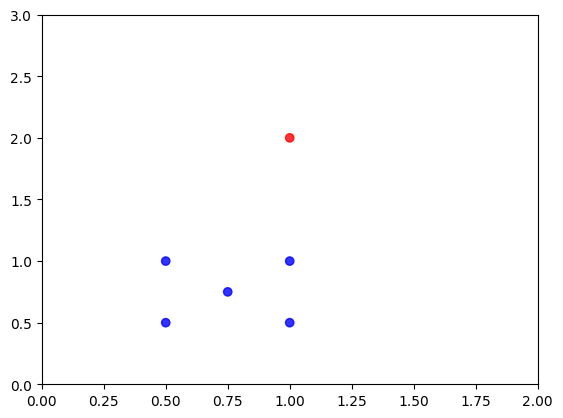

In [6]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
**YOUR ANSWER HERE**
******************

## Task 1.3 Theoretical questions (4 points)
<span style='color: green'>**\[Prove\]**</span> 

1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric 
2. Prove that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

*******************
**YOUR ANSWER HERE**
******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about red wine variants of the Portuguese "Vinho Verde" wine. It only contains physicochemical and sensory variables, so no prices, grape types and such. Every sample  has also a class of quality which has scores between 1 and 10. It has been used and published with [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016)

In [3]:
toy = wq[wq['quality'].isin([4, 8])]
data_np = toy.to_numpy()
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = data_np[:,:10]
y = data_np[:,11]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

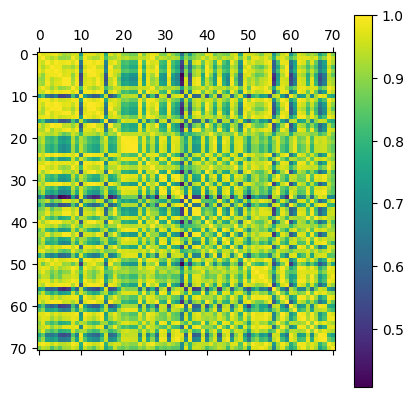

In [75]:
def correlation_matrix(X):
    n, d = X.shape
    corr = np.empty((n,n)) # (d,d)??
    for i in range(n): # d?
        my_1 = np.mean(X[i,:])
        for j in range(n): #d?
            my_2 = np.mean(X[j,:])

            sigma_ij = (1 / (n - 1)) * np.sum((X[i,:] - my_1) * (X[j,:] - my_2))
            sigma_i = (1 / (n - 1)) * np.sum((X[i,:] - my_1) * (X[i,:] - my_1))
            sigma_j = (1 / (n - 1)) * np.sum((X[j,:] - my_2) * (X[j,:] - my_2))

            corr[i,j] = sigma_ij / np.sqrt(sigma_i * sigma_j)

    return corr
    
X = data_np
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in point A), which pair of different attributes has the highest correlation? <br>

MORE
*******************
Obviously, the diagonal of the correlation matrix has a correlation values of $1$, as a variable clearly is correlation with itself. <br>
Generally speaking when observing the pairs with highest correlation, we must look for regions (in the above plot) that has hight values. 
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two attributs are highly correlated? <br>

*******************
Generally speaking correlation (thereby also correlation matrix) is a measure for the correlation or dependence between two random variables. We consider this association as a degree in which the pair of variables are linearly dependent. <br>
The correlation matrix is essentially just a normalized / standardized covariance matrix, where the covariance measures the joint variability of two random variables. Essentially the variables tend to show similar behavior. 
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the attributes of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below.
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [X] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

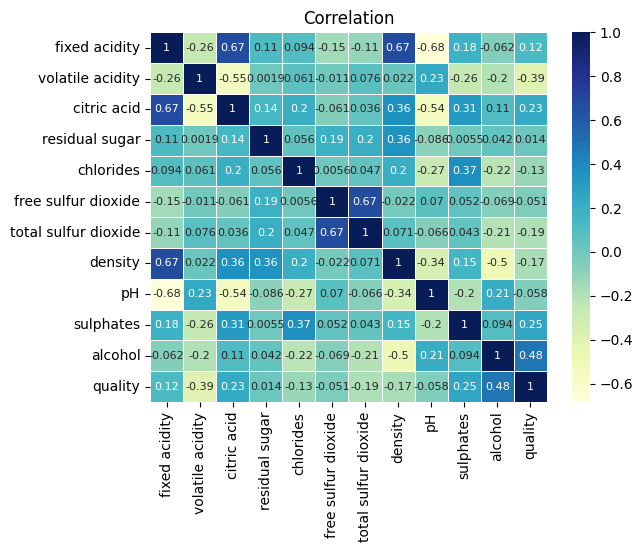

In [58]:
sns.heatmap(wq.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Correlation')
plt.show()

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

[3.13096211e+00 5.43720591e-02 4.80387225e-02 2.74932355e+00
 4.37789962e-03 8.96580044e+01 7.13600873e+02 3.50636298e-06
 3.62217417e-02 5.07168816e-02 1.63201845e+00 3.02797064e+00]


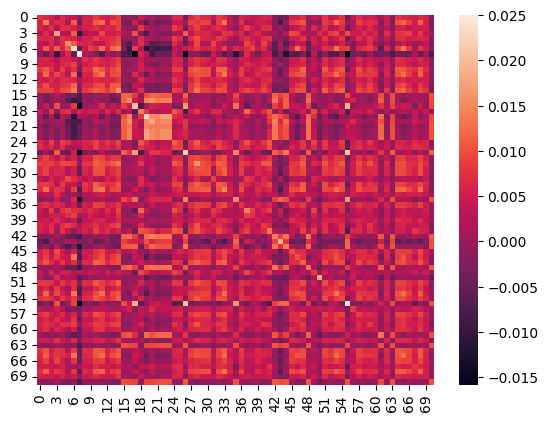

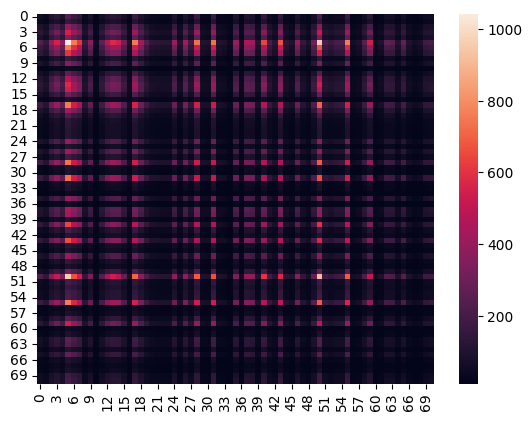

The unnormalied data


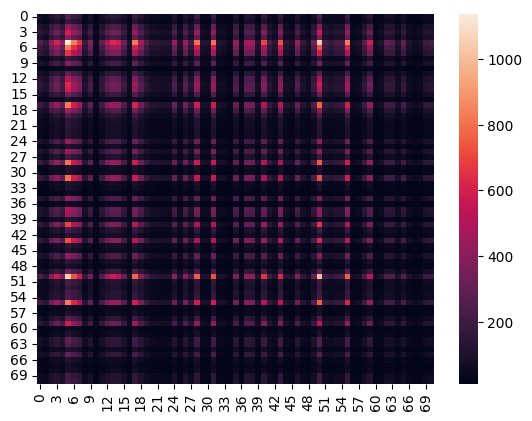

In [139]:
# Data
X = data_np
n, d = X.shape
# YOUR CODE HERE


def covariance_matrix(X):
    cov = np.empty((n,n)) # (d,d)??
    for i in range(n): # d?
        my_1 = np.mean(X[i,:])
        for j in range(n): #d?
            my_2 = np.mean(X[j,:])
            sigma_ij = (1 / (n - 1)) * np.sum((X[i,:] - my_1) * (X[j,:] - my_2))
            cov[i,j] = sigma_ij
    return cov
    
print("The Unnormalied Data")
Cov = covariance_matrix(X)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()


my = np.mean(X, axis=0)
sigma = np.var(X, axis=0)

std_norm = np.empty((n, d)) 
for i in range(n):
    for j in range(d):
        std_norm[i,j] = (X[i,j] - my[j]) / sigma

print("The Standard Score Normalized Data")
Cov = covariance_matrix(std_norm)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()



range_max = np.max(X, axis=0)
range_min = np.min(X, axis=0)

range_norm = np.empty((n, d)) 
for i in range(n):
    for j in range(d):
        range_norm[i, j] = (X[i,j] - range_min[j]) / (range_max[j] - range_min[j])

print("The Range Normalized Data")
Cov = covariance_matrix(range_norm)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()




# YOUR CODE HERE



sns.heatmap(np.cov(X, bias=True), annot=False, fmt='g')
plt.show()

print("The unnormalied data")
sns.heatmap(np.cov(X), annot=False, fmt='g')
plt.show()

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Describe\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>IMPORTANT: You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [ ]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [ ]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the attribute features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Describe\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

In [ ]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

Use the "sulphates" and "alcohol" features of the data set.

In [ ]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>IMPORTANT: You can use the KMeans implementation from scikit-learn.</font> <br>

In [ ]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)


### YOUR CODE HERE


clusters = []

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span><br> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 


In [ ]:
### YOUR CODE HERE
X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8): 
    k = 0 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return k


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01): 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return clusters


clusters = kernel_kmeans(X_norm, NUMBER_OF_CLUSTERS)

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, SOME_AMOUNT_OF_CLUSTERS)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $C$ **given** $T$ is given by: 
$$\text{CE}(C|T)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n_i}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [ ]:
def entropy(C):
    # Let C be a list of clusters
    entropy = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return entropy


def CE(C1, C2):
    ce = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return ce

    

X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Plot the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. 
Make sure that the number of clusters and the number of class labels is the same.<br>

In [ ]:
###YOUR CODE HERE


###YOUR CODE HERE
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Describe\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [ ]:
### YOUR CODE HERE
T = np.array([]) # Ground-truth clusters
C = np.array([]) # Clusters obtained by k-means
### YOUR CODE HERE

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return purity

print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Plot the purity of the clusters obtained by k-means in Task 3.1.1. 


In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [ ] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3 OPTICS

### Task 3.3.1 (7 point)
<span style='color: green'>**\[Implement\]**</span> the OPTICS algorithm

If you do not remember [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm), check the slides or the lecture notes. 

In [ ]:
def rdist(x,y,eps,min_samples):
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return rdis

def optics(X, eps, min_samples): 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return clusters

### Task 3.3.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run OPTICS with parameters $\varepsilon=0.07, minPts=3$. <br> 

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare the results of OPTICS with those of k-means. Which of the two methods two achieve a better **CE**? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run OPTICS on each subset. 
3. Compute **CE** for each subset. 
4. Keep the k subsets with the largest **CE**. 
    
<font color='red'>IMPORTANT: You may have to experiment a lot with eps and MinPts to get reasonable clusters. You are allowed to use **itertools** library to iterate over all subsets of size 2 and 3.</font>

In [ ]:
# Necessary Data normalization!
X_pt = toy.to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0) 

### YOUR CODE HERE




### YOUR CODE HERE

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [ ]:
X_small = toy[["sulphates", "alcohol"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [ ]:
def DBOutliers(X, eps, pi): 
    outliers = None
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR CODE ENDS HERE
    return outliers

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [ ]:
def tune_dboutliers(X): 
    eps = 0
    pi = 0
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR ENDS CODE HERE
    return eps, pi

B) <span style='color: green'>**\[Describe\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Describe\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

In [ ]:
### YOUR CODE HERE

*******************
**YOUR ANSWER HERE**
******************